# Data collection for the development of a sampling method for market exploration 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import seaborn as sn
import matplotlib.pyplot as plt

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


# Collecting data for the first hungarian tow: Pécs

In [13]:
#getting the coordinates of Pécs, around his point every a cirle with 500 meter radius is explored to find all of the venues
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city ="Pécs"
country ="Hungary"
loc = geolocator.geocode(city+','+ country)
print("latitude is : " ,loc.latitude,"\nlongtitude is: " ,loc.longitude)

latitude is :  46.0763222 
longtitude is:  18.2280746


In [14]:
# Creation of map of Pécs using latitude and longitude values in order to check that the coordinates are right
latitude_p = 46.076322
longitude_p = 18.2280746
map_p = folium.Map(location=[latitude_p, longitude_p], zoom_start=10)
   
map_p

In [15]:
#Defining Foursquare API parameters
CLIENT_ID = 'UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG' # your Foursquare ID
CLIENT_SECRET = 'WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF' # your Foursquare Secret
VERSION = '20201225' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG
CLIENT_SECRET:WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF


In [16]:
# Necessary URL:
radius = 500
url_p = 'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=43.6542559,-79.3606359&v=20201220&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude_p, longitude_p, VERSION, radius, LIMIT)
url_p

'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=43.6542559,-79.3606359&v=20201220&radius=500&limit=100'

In [17]:
# Using request.get funcion to obtain the data of the venues in a json file:
results_p = requests.get(url_p).json()
results_p

{'meta': {'code': 200, 'requestId': '5feecd9678a7474f016ba43f'},
 'response': {'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.658755904500005,
    'lng': -79.3544279005621},
   'sw': {'lat': 43.6497558955, 'lng': -79.36684389943791}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.653446723052674,
          'lng': -79.3620167174383}],
        'distance': 143

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
# preparation and cleaning of the Json file:

venues_p = results_p['response']['groups'][0]['items']
    
nearby_venues_p = json_normalize(venues_p) # flatten JSON

# filter columns
filtered_columns_p = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_p = nearby_venues_p.loc[:, filtered_columns_p]

# filter the category for each row
nearby_venues_p['venue.categories'] = nearby_venues_p.apply(get_category_type, axis=1)

# clean columns
nearby_venues_p.columns = [col.split(".")[-1] for col in nearby_venues_p.columns]

nearby_venues_p.head()


<ipython-input-19-01bd6cfae189>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues_p = json_normalize(venues_p) # flatten JSON


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
4,Body Blitz Spa East,Spa,43.654735,-79.359874


In [20]:
#selection of unique vanues
nearby_venues_p.categories.unique()

array(['Bakery', 'Coffee Shop', 'Distribution Center', 'Breakfast Spot',
       'Spa', 'Restaurant', 'Gym / Fitness Center', 'Park',
       'Historic Site', 'Chocolate Shop', 'Farmers Market',
       'Dessert Shop', 'Pub', 'Performing Arts Venue',
       'French Restaurant', 'Event Space', 'Yoga Studio', 'Café',
       'Mexican Restaurant', 'Theater', 'Shoe Store', 'Brewery',
       'Art Gallery', 'Cosmetics Shop', 'Electronics Store', 'Beer Store',
       'Bank', 'Hotel', 'Health Food Store', 'Antique Shop'], dtype=object)

In [21]:
# Shape of the dataframe:
nearby_venues_p.shape

(46, 4)

In [22]:
#Counting the unique values:
nearby_venues_p['categories'].value_counts()

Coffee Shop              7
Park                     3
Café                     3
Pub                      3
Bakery                   3
Breakfast Spot           2
Theater                  2
Antique Shop             1
Beer Store               1
Farmers Market           1
Chocolate Shop           1
Historic Site            1
Health Food Store        1
Bank                     1
French Restaurant        1
Mexican Restaurant       1
Brewery                  1
Event Space              1
Cosmetics Shop           1
Hotel                    1
Art Gallery              1
Distribution Center      1
Performing Arts Venue    1
Gym / Fitness Center     1
Spa                      1
Dessert Shop             1
Restaurant               1
Shoe Store               1
Electronics Store        1
Yoga Studio              1
Name: categories, dtype: int64

In [23]:
#number of venues, Bakery, Coffee shop, Restaurant, Distribution Center, Breakfast Spot, Chocolate Shop, Dessert Shop, Café

In [24]:
#summarizing all restaurants:
nearby_venues_p[nearby_venues_p['categories'].str.contains("Restaurant")]


,name,categories,lat,lng
5,Impact Kitchen,Restaurant,43.656369,-79.356980
20,Cluny Bistro & Boulangerie,French Restaurant,43.650565,-79.357843
28,El Catrin,Mexican Restaurant,43.650601,-79.358920


In [25]:
#Those vanues were manually selected which were possible targets to sell food and drink ingredients
data_p = { 
    'Town' : ['Pécs'], 
    'Bakery' : [3], 
    'Coffee Shop' : [7],
    'Restaurant' : [3],
    'Distribution Center' : [1],
    'Breakfast Shop' : [2],
    'Chocolate Shop' : [1],
    'Dessert Shop' : [1],
    'Café' : [3],
} 

In [26]:
#Visualizing the venues in a dataframe
df_p = pd.DataFrame(data_p)
df_p

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café
0,Pécs,3,7,3,1,2,1,1,3


# The already described steps will be repeated 7 times with seven different Hungarian towns. The resulted data of the venues will be merge into a final dataframe (it is marked by df_pgksvzta at the abolute bottom of this notebook). After a minimal data cleaning this dataframe (df_pgksvzta) will be the starting data of the furhter investigations.

In [27]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city ="Győr"
country ="Hungary"
loc = geolocator.geocode(city+','+ country)
print("latitude is : " ,loc.latitude,"\nlongtitude is: " ,loc.longitude)

latitude is :  47.687609 
longtitude is:  17.6346815


In [28]:
latitude_g = 47.68769
longitude_g = 17.6346815

url_g = 'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=47.687609,17.6346815&v=20201224&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude_g, longitude_g, VERSION, radius, LIMIT)
url_g

'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=47.687609,17.6346815&v=20201224&radius=500&limit=100'

In [29]:
results_g = requests.get(url_g).json()
results_g

{'meta': {'code': 200, 'requestId': '5feecda0ba6fa474b86447ab'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 69,
  'suggestedBounds': {'ne': {'lat': 47.692109004500004,
    'lng': 17.641353790964345},
   'sw': {'lat': 47.6831089955, 'lng': 17.628009209035653}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57addd93498ee63cbc21e784',
       'name': 'Kuglóf Cukrászda',
       'location': {'lat': 47.68775502777538,
        'lng': 17.633786929936395,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.68775502777538,
          'lng': 17.633786

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
venues_g = results_g['response']['groups'][0]['items']
    
nearby_venues_g = json_normalize(venues_g) # flatten JSON

# filter columns
filtered_columns_g = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_g = nearby_venues_g.loc[:, filtered_columns_g]

# filter the category for each row
nearby_venues_g['venue.categories'] = nearby_venues_g.apply(get_category_type, axis=1)

# clean columns
nearby_venues_g.columns = [col.split(".")[-1] for col in nearby_venues_g.columns]

nearby_venues_g.head()


<ipython-input-31-f44a16ebbb71>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues_g = json_normalize(venues_g) # flatten JSON


,name,categories,lat,lng
0,Kuglóf Cukrászda,Pie Shop,47.687755,17.633787
1,Széchenyi tér,Plaza,47.688247,17.634140
2,Győri Nemzeti Színház,Theater,47.687018,17.636394
3,Bécsi Kávéház,Café,47.686110,17.633160
4,Csillag EzPresszó,Bar,47.687356,17.633901


In [32]:
nearby_venues_g.categories.unique()

array(['Pie Shop', 'Plaza', 'Theater', 'Café', 'Bar', 'Wine Bar',
       'Tanning Salon', 'Coffee Shop', 'Hungarian Restaurant', 'Pub',
       'Pedestrian Plaza', 'Turkish Restaurant', 'Hotel Bar',
       'Breakfast Spot', 'Burger Joint', 'Mexican Restaurant',
       'Concert Hall', 'Waterfront', 'Island', 'Falafel Restaurant',
       'Italian Restaurant', 'Beer Bar', 'Restaurant', 'Music Venue',
       'Cocktail Bar', 'Bakery', 'Tea Room', 'Historic Site',
       'Grocery Store', 'Beer Garden', 'Hotel', 'Park', 'Dessert Shop',
       'Fountain', 'Diner', 'Flower Shop', 'Gastropub',
       'Eastern European Restaurant', 'Bookstore', 'Sporting Goods Shop'],
      dtype=object)

In [33]:
nearby_venues_g['categories'].value_counts()

Coffee Shop                    5
Hungarian Restaurant           4
Pub                            4
Hotel                          4
Restaurant                     4
Plaza                          4
Café                           3
Italian Restaurant             3
Bar                            3
Beer Garden                    2
Breakfast Spot                 2
Diner                          2
Gastropub                      2
Waterfront                     1
Eastern European Restaurant    1
Pie Shop                       1
Mexican Restaurant             1
Falafel Restaurant             1
Hotel Bar                      1
Pedestrian Plaza               1
Theater                        1
Bakery                         1
Sporting Goods Shop            1
Flower Shop                    1
Cocktail Bar                   1
Wine Bar                       1
Turkish Restaurant             1
Bookstore                      1
Concert Hall                   1
Beer Bar                       1
Grocery St

In [34]:
nearby_venues_g.shape

(69, 4)

In [35]:
#Pie Shop, Café, Coffee Shop, Restaurant, Breakfast Spot, Burger Joint, Bakery, Tea Room, Grocery Store, Dessert Shop, Diner, 

In [36]:
nearby_venues_g[nearby_venues_g['categories'].str.contains("Restaurant")]

,name,categories,lat,lng
9,LAMAREDA Étterem és Bisztró,Hungarian Restaurant,47.689218,17.633495
12,Peti's Döner Kebap & Sandwich,Turkish Restaurant,47.687634,17.632736
21,Tres Amigos Mexikói Étterem,Mexican Restaurant,47.688319,17.635474
25,Kebap Ház,Falafel Restaurant,47.687170,17.636486
26,La Dolce Vita Ristorante - Étterem - Pizzeria,Italian Restaurant,47.687330,17.636067
28,Arrabona Ételbár,Restaurant,47.686124,17.632405
29,Pizza Piccolino,Italian Restaurant,47.687564,17.633376
30,Faceroom Bar & Restaurant,Restaurant,47.687559,17.636383
31,Westy Hajó Étterem,Hungarian Restaurant,47.690917,17.633407
43,Pálffytália,Italian Restaurant,47.688278,17.634187


In [37]:
#Pie Shop, Café, Coffe Shop, Restaurant, Breakfast Spot, Burger Joint, Bakery, Tea Room, Grocery Store, Dessert Shop, Diner, 
data_g = { 
    'Town' : ['Győr'], 
    'Pie shop' : [1], 
    'Café' : [4],
    'Coffee Shop' : [3],
    'Restaurant' : [16],
    'Breakfast Spot' : [2],
    'Burger Joint' : [1],
    'Bakery' : [2],
    'Tea Room' : [1],
    'Grocery Store' : [1],
    'Dessert Shop' : [1],
    'Diner' : [1]
} 

In [38]:
df_p = pd.DataFrame(data_p)
df_p

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café
0,Pécs,3,7,3,1,2,1,1,3


In [39]:
df_g = pd.DataFrame(data_g)
df_g

,Town,Pie shop,Café,Coffee Shop,Restaurant,Breakfast Spot,Burger Joint,Bakery,Tea Room,Grocery Store,Dessert Shop,Diner
0,Győr,1,4,3,16,2,1,2,1,1,1,1


In [40]:
df_pg = pd.concat([df_p, df_g])
df_pg

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café,Pie shop,Breakfast Spot,Burger Joint,Tea Room,Grocery Store,Diner
0,Pécs,3,7,3,1.0,2.0,1.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
0,Győr,2,3,16,NaN,NaN,NaN,1,4,1.0,2.0,1.0,1.0,1.0,1.0


In [41]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city ="Kaposvár"
country ="Hungary"
loc = geolocator.geocode(city+','+ country)
print("latitude is : " ,loc.latitude,"\nlongtitude is: " ,loc.longitude)

latitude is :  46.3564692 
longtitude is:  17.7886886


In [42]:
latitude_k = 46.3564692 
longitude_k = 17.7886886

# Creation of map of Toronto using latitude and longitude values
map_k = folium.Map(location=[latitude_k, longitude_k], zoom_start=10)
   
map_k

In [43]:
# Necessary URL:
radius = 500
url_k = 'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=46.3564692,17.7886886&v=20201224&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude_p, longitude_p, VERSION, radius, LIMIT)
url_k

'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=46.3564692,17.7886886&v=20201224&radius=500&limit=100'

In [44]:
results_k = requests.get(url_k).json()
results_k

{'meta': {'code': 200, 'requestId': '5feecdabe2c947606ef23ba8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Kaposvár',
  'headerFullLocation': 'Kaposvár',
  'headerLocationGranularity': 'city',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 46.3609692045, 'lng': 17.795196569747592},
   'sw': {'lat': 46.3519691955, 'lng': 17.78218063025241}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57551d3c498e2f5385f9ae2b',
       'name': 'La Pergola Étterem & Pizzéria',
       'location': {'address': 'Ady Endre u. 15.',
        'lat': 46.35603811302986,
        'lng': 17.78613048862987,
        'labeledLatLngs': [{'label': 'display',
          'lat': 46.35603811302986,
    

In [45]:
venues_k = results_k['response']['groups'][0]['items']
    
nearby_venues_k = json_normalize(venues_k) # flatten JSON

# filter columns
filtered_columns_k = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_k = nearby_venues_k.loc[:, filtered_columns_k]

# filter the category for each row
nearby_venues_k['venue.categories'] = nearby_venues_k.apply(get_category_type, axis=1)

# clean columns
nearby_venues_k.columns = [col.split(".")[-1] for col in nearby_venues_k.columns]

nearby_venues_k.head()

<ipython-input-45-198aed04a833>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues_k = json_normalize(venues_k) # flatten JSON


,name,categories,lat,lng
0,La Pergola Étterem & Pizzéria,Mediterranean Restaurant,46.356038,17.786130
1,Eleven Kultúrbisztró,Café,46.356157,17.786462
2,Hansdonner Sörház,Beer Bar,46.355602,17.788486
3,Trattoria La Prima,Italian Restaurant,46.356257,17.789097
4,H&M,Clothing Store,46.356197,17.784752


In [46]:
nearby_venues_k.categories.unique()

array(['Mediterranean Restaurant', 'Café', 'Beer Bar',
       'Italian Restaurant', 'Clothing Store', 'Concert Hall',
       'Pizza Place', 'Pedestrian Plaza', 'Eastern European Restaurant',
       'Hungarian Restaurant', 'Hotel', 'Cosmetics Shop', 'Plaza', 'Bar',
       'Dessert Shop', 'Burger Joint', 'Music Venue', 'Shopping Mall',
       'General Entertainment', 'Supermarket', 'Food Court',
       'Electronics Store', 'Sporting Goods Shop',
       'Paper / Office Supplies Store'], dtype=object)

In [47]:
nearby_venues_k.shape

(30, 4)

In [48]:
nearby_venues_k['categories'].value_counts()

Café                             4
Bar                              2
Pizza Place                      2
Hungarian Restaurant             2
Cosmetics Shop                   1
Music Venue                      1
Sporting Goods Shop              1
Concert Hall                     1
Plaza                            1
General Entertainment            1
Italian Restaurant               1
Shopping Mall                    1
Eastern European Restaurant      1
Supermarket                      1
Clothing Store                   1
Food Court                       1
Pedestrian Plaza                 1
Dessert Shop                     1
Mediterranean Restaurant         1
Burger Joint                     1
Beer Bar                         1
Electronics Store                1
Paper / Office Supplies Store    1
Hotel                            1
Name: categories, dtype: int64

In [49]:
nearby_venues_k[nearby_venues_k['categories'].str.contains("Restaurant")]

,name,categories,lat,lng
0,La Pergola Étterem & Pizzéria,Mediterranean Restaurant,46.356038,17.786130
3,Trattoria La Prima,Italian Restaurant,46.356257,17.789097
8,Kapos Étterem,Eastern European Restaurant,46.356468,17.788229
9,Corner Étterem,Hungarian Restaurant,46.358298,17.787737
19,Corso Club & Restaurant,Hungarian Restaurant,46.356747,17.794074


In [50]:
data_k = {
    'Town' : ['Kaposvár'], 
    'Café' : [5], 
    'Restaurant' : [5],
    'Pizza Place' : [2],
    'Dessert Shop' : [1],
    'Supermarket' : [1],
    'Grocery Store' : [2],
    'Burger Joint' : [1],
     
} 

In [51]:
df_k = pd.DataFrame(data_k)
df_k

,Town,Café,Restaurant,Pizza Place,Dessert Shop,Supermarket,Grocery Store,Burger Joint
0,Kaposvár,5,5,2,1,1,2,1


In [52]:
df_pgk = pd.concat([df_pg, df_k])
df_pgk

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café,Pie shop,Breakfast Spot,Burger Joint,Tea Room,Grocery Store,Diner,Pizza Place,Supermarket
0,Pécs,3.0,7.0,3,1.0,2.0,1.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Győr,2.0,3.0,16,NaN,NaN,NaN,1,4,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN
0,Kaposvár,NaN,NaN,5,NaN,NaN,NaN,1,5,NaN,NaN,1.0,NaN,2.0,NaN,2.0,1.0


In [53]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city ="Szekszárd"
country ="Hungary"
loc = geolocator.geocode(city+','+ country)
print("latitude is : " ,loc.latitude,"\nlongtitude is: " ,loc.longitude)

latitude is :  46.3484884 
longtitude is:  18.701663


In [54]:
latitude_s = 46.3484884 
longitude_s = 18.701663

# Creation of map of Toronto using latitude and longitude values
map_s = folium.Map(location=[latitude_s, longitude_s], zoom_start=10)
   
map_s

In [55]:
radius = 500
url_s = 'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=46.3484884,18.701663&v=20201224&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude_p, longitude_p, VERSION, radius, LIMIT)
url_s

'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=46.3484884,18.701663&v=20201224&radius=500&limit=100'

In [56]:
results_s = requests.get(url_s).json()
results_s

{'meta': {'code': 200, 'requestId': '5feecdb7b1fef738c4b1fc77'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Szekszárd',
  'headerFullLocation': 'Szekszárd',
  'headerLocationGranularity': 'city',
  'totalResults': 22,
  'suggestedBounds': {'ne': {'lat': 46.3529884045, 'lng': 18.708170019474444},
   'sw': {'lat': 46.3439883955, 'lng': 18.695155980525556}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bccd6ff937ca5938edeab92',
       'name': 'Béla király tér',
       'location': {'address': 'Béla király tér',
        'lat': 46.34929981350569,
        'lng': 18.69907517958331,
        'labeledLatLngs': [{'label': 'display',
          'lat': 46.34929981350569,
          'lng':

In [57]:
venues_s = results_s['response']['groups'][0]['items']
    
nearby_venues_s = json_normalize(venues_s) # flatten JSON

# filter columns
filtered_columns_s = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_s = nearby_venues_s.loc[:, filtered_columns_s]

# filter the category for each row
nearby_venues_s['venue.categories'] = nearby_venues_s.apply(get_category_type, axis=1)

# clean columns
nearby_venues_s.columns = [col.split(".")[-1] for col in nearby_venues_s.columns]

nearby_venues_s.head()

<ipython-input-57-e11dab22b5e8>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues_s = json_normalize(venues_s) # flatten JSON


,name,categories,lat,lng
0,Béla király tér,Plaza,46.349300,18.699075
1,Garay Pince,Wine Bar,46.349119,18.699509
2,Szász Söröző és Étterem,Eastern European Restaurant,46.349108,18.699366
3,Amaryllis Étterem és Bár,Hungarian Restaurant,46.349714,18.703795
4,Garay tér,Plaza,46.348697,18.701782


In [58]:
nearby_venues_s.categories.unique()

array(['Plaza', 'Wine Bar', 'Eastern European Restaurant',
       'Hungarian Restaurant', 'Restaurant', 'Dessert Shop', 'Nightclub',
       'Pizza Place', 'Bar', 'Chinese Restaurant', 'Grocery Store',
       'General Entertainment', 'Café', 'Pharmacy', 'Pub', 'Tea Room',
       'Bed & Breakfast', 'History Museum'], dtype=object)

In [59]:
nearby_venues_s.shape

(22, 4)

In [60]:
nearby_venues_s['categories'].value_counts()

Wine Bar                       2
Plaza                          2
Dessert Shop                   2
Eastern European Restaurant    2
Restaurant                     1
History Museum                 1
Bed & Breakfast                1
Pub                            1
Pharmacy                       1
Grocery Store                  1
Chinese Restaurant             1
General Entertainment          1
Hungarian Restaurant           1
Nightclub                      1
Bar                            1
Tea Room                       1
Pizza Place                    1
Café                           1
Name: categories, dtype: int64

In [61]:
nearby_venues_s[nearby_venues_s['categories'].str.contains("Restaurant")]

,name,categories,lat,lng
2,Szász Söröző és Étterem,Eastern European Restaurant,46.349108,18.699366
3,Amaryllis Étterem és Bár,Hungarian Restaurant,46.349714,18.703795
5,Toscana Étterem,Restaurant,46.348524,18.702625
11,Kínai Gyorsbüfé,Chinese Restaurant,46.344963,18.702883
21,Ízlelő családbarát étterem,Eastern European Restaurant,46.349505,18.695362


In [62]:
data_s = {
    'Town' : ['Szekszárd'], 
    'Café' : [5], 
    'Restaurant' : [4],
    'Dessert Shop' : [2],
    'Pizza Place' : [1],
    'Bed & Breakfast' : [1],
    'Grocery Store' : [1],
    'Café   ' : [1],
     
} 



In [63]:
df_s = pd.DataFrame(data_s)
df_s

,Town,Café,Restaurant,Dessert Shop,Pizza Place,Bed & Breakfast,Grocery Store,Café
0,Szekszárd,5,4,2,1,1,1,1


In [64]:
df_pgks = pd.concat([df_pgk, df_s])
df_pgks

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café,Pie shop,Breakfast Spot,Burger Joint,Tea Room,Grocery Store,Diner,Pizza Place,Supermarket,Bed & Breakfast,Café
0,Pécs,3.0,7.0,3,1.0,2.0,1.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Győr,2.0,3.0,16,NaN,NaN,NaN,1,4,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
0,Kaposvár,NaN,NaN,5,NaN,NaN,NaN,1,5,NaN,NaN,1.0,NaN,2.0,NaN,2.0,1.0,NaN,NaN
0,Szekszárd,NaN,NaN,4,NaN,NaN,NaN,2,5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0


In [65]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city ="Veszprém"
country ="Hungary"
loc = geolocator.geocode(city+','+ country)
print("latitude is : " ,loc.latitude,"\nlongtitude is: " ,loc.longitude)

latitude is :  47.0928058 
longtitude is:  17.9140147


In [66]:
latitude_v = 47.0928058
longitude_v = 17.9140147

# Creation of map of Toronto using latitude and longitude values
map_v = folium.Map(location=[latitude_v, longitude_v], zoom_start=10)
   
map_v

In [67]:
radius = 500
url_v = 'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=47.0928058,17.9140147&v=20201224&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude_p, longitude_p, VERSION, radius, LIMIT)
url_v

'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=47.0928058,17.9140147&v=20201224&radius=500&limit=100'

In [68]:
results_v = requests.get(url_v).json()
results_v

{'meta': {'code': 200, 'requestId': '5feecdbd8ed5f550e582f52a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Veszprém',
  'headerFullLocation': 'Veszprém',
  'headerLocationGranularity': 'city',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 47.0973058045, 'lng': 17.920612111490705},
   'sw': {'lat': 47.0883057955, 'lng': 17.907417288509293}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57c9bced498e1f8718bf9fef',
       'name': "Johnny's Bistro",
       'location': {'lat': 47.0933527900964,
        'lng': 17.91173334603773,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.0933527900964,
          'lng': 17.91173334603773}],
        'distance': 

In [69]:
venues_v = results_v['response']['groups'][0]['items']
    
nearby_venues_v = json_normalize(venues_v) # flatten JSON

# filter columns
filtered_columns_v = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_v = nearby_venues_v.loc[:, filtered_columns_v]

# filter the category for each row
nearby_venues_v['venue.categories'] = nearby_venues_v.apply(get_category_type, axis=1)

# clean columns
nearby_venues_v.columns = [col.split(".")[-1] for col in nearby_venues_v.columns]

nearby_venues_v.head()

<ipython-input-69-d9d0d0b0cd55>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues_v = json_normalize(venues_v) # flatten JSON


,name,categories,lat,lng
0,Johnny's Bistro,Burger Joint,47.093353,17.911733
1,Kokó Terasz,Dessert Shop,47.093225,17.912019
2,Kossuth utca,Road,47.093115,17.910979
3,Jimmy's Kebab Büfé,Burger Joint,47.092415,17.911491
4,Incognito Kávézó és Étterem,Coffee Shop,47.093317,17.908890


In [70]:
nearby_venues_v.categories.unique()

array(['Burger Joint', 'Dessert Shop', 'Road', 'Coffee Shop', 'Gym',
       'Concert Hall', 'Pub', 'Restaurant', 'General Entertainment',
       'Farmers Market', 'Pizza Place', 'Clothing Store', 'Bakery',
       'Electronics Store', 'Bookstore', 'Café', 'Gourmet Shop', 'Museum',
       'Shopping Mall'], dtype=object)

In [71]:
nearby_venues_v.shape

(30, 4)

In [72]:
nearby_venues_v['categories'].value_counts()

Restaurant               5
Coffee Shop              3
Pub                      3
Burger Joint             3
Dessert Shop             2
General Entertainment    1
Shopping Mall            1
Concert Hall             1
Gourmet Shop             1
Café                     1
Gym                      1
Farmers Market           1
Clothing Store           1
Road                     1
Electronics Store        1
Museum                   1
Pizza Place              1
Bakery                   1
Bookstore                1
Name: categories, dtype: int64

In [73]:
data_v = {
    'Town' : ['Veszprém'], 
    'Café' : [1], 
    'Restaurant' : [7],
    'Coffee Shop': [4],
    'Pizza Place' : [1],
    'Dessert Shop' : [2],
    'Grocery Store' : [2],
    'Burger Joint' : [3],
    'Bakery': [1], 
    'Gourmet Shop': [1],
    'Shopping Mall': [2],
} 

In [74]:
df_v = pd.DataFrame(data_v)
df_v

,Town,Café,Restaurant,Coffee Shop,Pizza Place,Dessert Shop,Grocery Store,Burger Joint,Bakery,Gourmet Shop,Shopping Mall
0,Veszprém,1,7,4,1,2,2,3,1,1,2


In [75]:
df_pgksv = pd.concat([df_pgks, df_v])
df_pgksv

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café,Pie shop,Breakfast Spot,Burger Joint,Tea Room,Grocery Store,Diner,Pizza Place,Supermarket,Bed & Breakfast,Café,Gourmet Shop,Shopping Mall
0,Pécs,3.0,7.0,3,1.0,2.0,1.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Győr,2.0,3.0,16,NaN,NaN,NaN,1,4,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
0,Kaposvár,NaN,NaN,5,NaN,NaN,NaN,1,5,NaN,NaN,1.0,NaN,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN
0,Szekszárd,NaN,NaN,4,NaN,NaN,NaN,2,5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN
0,Veszprém,1.0,4.0,7,NaN,NaN,NaN,2,1,NaN,NaN,3.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0


In [76]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city ="Zalaegerszeg"
country ="Hungary"
loc = geolocator.geocode(city+','+ country)
print("latitude is : " ,loc.latitude,"\nlongtitude is: " ,loc.longitude)

latitude is :  46.8415803 
longtitude is:  16.8456316


In [77]:
latitude_z = 46.8415803
longitude_z = 16.8456316


# Creation of map of Toronto using latitude and longitude values
map_z = folium.Map(location=[latitude_z, longitude_z], zoom_start=10)
   
map_z

In [78]:
radius = 500
url_z = 'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=46.8415803,16.8456316&v=20201226&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude_z, longitude_z, VERSION, radius, LIMIT)
url_z

'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=46.8415803,16.8456316&v=20201226&radius=500&limit=100'

In [79]:
results_z = requests.get(url_z).json()
results_z

{'meta': {'code': 200, 'requestId': '5feecdc4960a06004f51450c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Zalaegerszeg',
  'headerFullLocation': 'Zalaegerszeg',
  'headerLocationGranularity': 'city',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 46.8460803045, 'lng': 16.85219809841039},
   'sw': {'lat': 46.837080295499995, 'lng': 16.83906510158961}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fabaa14e4b09016f6c25e2f',
       'name': 'Paradicsom Étterem',
       'location': {'address': 'Kosztolányi út 11/A',
        'lat': 46.84099789888511,
        'lng': 16.84728622460794,
        'labeledLatLngs': [{'label': 'display',
          'lat': 46.84099789888511,


In [80]:
venues_z = results_z['response']['groups'][0]['items']
    
nearby_venues_z = json_normalize(venues_z) # flatten JSON

# filter columns
filtered_columns_z = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_z = nearby_venues_z.loc[:, filtered_columns_z]

# filter the category for each row
nearby_venues_z['venue.categories'] = nearby_venues_z.apply(get_category_type, axis=1)

# clean columns
nearby_venues_z.columns = [col.split(".")[-1] for col in nearby_venues_z.columns]

nearby_venues_z.head()

<ipython-input-80-872a6b7650f9>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues_z = json_normalize(venues_z) # flatten JSON


,name,categories,lat,lng
0,Paradicsom Étterem,Restaurant,46.840998,16.847286
1,Egurzegh Belga Söröző-Étterem,Gastropub,46.842933,16.845388
2,Hevesi Sándor Színház,Arts & Entertainment,46.841832,16.848947
3,Díszpinty,Gastropub,46.841726,16.846217
4,Csipet Menu&Pasta,Italian Restaurant,46.840890,16.846610


In [81]:
nearby_venues_z.categories.unique()

array(['Restaurant', 'Gastropub', 'Arts & Entertainment',
       'Italian Restaurant', 'Mexican Restaurant', 'Pub', 'Lounge',
       'Fast Food Restaurant', 'Burger Joint', 'Bar', 'Café', 'Nightclub',
       'Hotel', 'Plaza'], dtype=object)

In [82]:
nearby_venues_z.shape

(23, 4)

In [83]:
nearby_venues_z['categories'].value_counts()

Restaurant              4
Café                    3
Pub                     2
Gastropub               2
Lounge                  2
Fast Food Restaurant    2
Arts & Entertainment    1
Plaza                   1
Italian Restaurant      1
Burger Joint            1
Mexican Restaurant      1
Nightclub               1
Bar                     1
Hotel                   1
Name: categories, dtype: int64

In [84]:
nearby_venues_z[nearby_venues_z['categories'].str.contains("Restaurant")]

,name,categories,lat,lng
0,Paradicsom Étterem,Restaurant,46.840998,16.847286
4,Csipet Menu&Pasta,Italian Restaurant,46.840890,16.846610
5,Pedro étterem,Mexican Restaurant,46.842720,16.844023
8,Zalaco Bisztró,Restaurant,46.845398,16.846165
9,Gyroska,Fast Food Restaurant,46.843699,16.843788
12,Terra Incognita,Restaurant,46.843063,16.847354
17,Centro Restaurant,Restaurant,46.838647,16.843356
21,McDonald's,Fast Food Restaurant,46.845082,16.845903


In [85]:
data_z = {
    'Town' : ['Zalaegerszeg'], 
    'Café' : [3], 
    'Restaurant' : [8],
    'Burger Joint' : [1],
    'Bakery': [1],
        
} 

In [86]:
df_z = pd.DataFrame(data_z)
df_z

,Town,Café,Restaurant,Burger Joint,Bakery
0,Zalaegerszeg,3,8,1,1


In [87]:
df_pgksvz = pd.concat([df_pgksv, df_z])
df_pgksvz

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café,Pie shop,Breakfast Spot,Burger Joint,Tea Room,Grocery Store,Diner,Pizza Place,Supermarket,Bed & Breakfast,Café,Gourmet Shop,Shopping Mall
0,Pécs,3.0,7.0,3,1.0,2.0,1.0,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Győr,2.0,3.0,16,NaN,NaN,NaN,1.0,4,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
0,Kaposvár,NaN,NaN,5,NaN,NaN,NaN,1.0,5,NaN,NaN,1.0,NaN,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN
0,Szekszárd,NaN,NaN,4,NaN,NaN,NaN,2.0,5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN
0,Veszprém,1.0,4.0,7,NaN,NaN,NaN,2.0,1,NaN,NaN,3.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0
0,Zalaegerszeg,1.0,NaN,8,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city ="Tatabánya"
country ="Hungary"
loc = geolocator.geocode(city+','+ country)
print("latitude is : " ,loc.latitude,"\nlongtitude is: " ,loc.longitude)

latitude is :  47.5837788 
longtitude is:  18.3980308


In [89]:
latitude_t = 47.5837788
longitude_t = 18.3980308

# Creation of map of Toronto using latitude and longitude values
map_t = folium.Map(location=[latitude_t, longitude_t], zoom_start=10)
   
map_t

In [90]:
radius = 500
url_t = 'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=47.5837788,18.3980308&v=20201227&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude_t, longitude_t, VERSION, radius, LIMIT)
url_t

'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=47.5837788,18.3980308&v=20201227&radius=500&limit=100'

In [91]:
results_t = requests.get(url_t).json()
results_t

{'meta': {'code': 200, 'requestId': '5feecdceb4359f7d96dca854'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Tatabánya',
  'headerFullLocation': 'Tatabánya',
  'headerLocationGranularity': 'city',
  'totalResults': 15,
  'suggestedBounds': {'ne': {'lat': 47.5882788045, 'lng': 18.40468984578645},
   'sw': {'lat': 47.579278795499995, 'lng': 18.39137175421355}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d6955e02acd6ea868d138c0',
       'name': 'Don Giovanni Pizzéria',
       'location': {'lat': 47.58477607033224,
        'lng': 18.39561939239502,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.58477607033224,
          'lng': 18.39561939239502}],
       

In [92]:
venues_t = results_t['response']['groups'][0]['items']
    
nearby_venues_t = json_normalize(venues_t) # flatten JSON

# filter columns
filtered_columns_t = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_t = nearby_venues_t.loc[:, filtered_columns_t]

# filter the category for each row
nearby_venues_t['venue.categories'] = nearby_venues_t.apply(get_category_type, axis=1)

# clean columns
nearby_venues_t.columns = [col.split(".")[-1] for col in nearby_venues_t.columns]

nearby_venues_t.head()

<ipython-input-92-5e91e5dee68d>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues_t = json_normalize(venues_t) # flatten JSON


,name,categories,lat,lng
0,Don Giovanni Pizzéria,Pizza Place,47.584776,18.395619
1,Turul Café és Étterem,Café,47.585172,18.398333
2,Agora Kávézó & Étterem,Restaurant,47.581518,18.399194
3,Vértes Agorája,General Entertainment,47.581494,18.399220
4,Roxxy Music Cafe,Rock Club,47.584801,18.395170


In [93]:
nearby_venues_t.categories.unique()

array(['Pizza Place', 'Café', 'Restaurant', 'General Entertainment',
       'Rock Club', 'Plaza', 'Clothing Store', 'Bar', 'Multiplex',
       'Shopping Mall', 'Grocery Store', 'Fast Food Restaurant',
       'Chinese Restaurant', 'Bus Stop'], dtype=object)

In [94]:
nearby_venues_t.shape

(15, 4)

In [95]:
nearby_venues_t[nearby_venues_t['categories'].str.contains("Restaurant")]

,name,categories,lat,lng
2,Agora Kávézó & Étterem,Restaurant,47.581518,18.399194
11,McDonald's,Fast Food Restaurant,47.586248,18.393744
13,Ruyi Kínai Étterem,Chinese Restaurant,47.586437,18.393711


In [96]:
nearby_venues_t['categories'].value_counts()

Grocery Store            2
Rock Club                1
Restaurant               1
Pizza Place              1
Chinese Restaurant       1
Clothing Store           1
Multiplex                1
Bar                      1
General Entertainment    1
Café                     1
Shopping Mall            1
Plaza                    1
Bus Stop                 1
Fast Food Restaurant     1
Name: categories, dtype: int64

In [97]:
data_t = {
    'Town' : ['Tatabánya'], 
    'Café' : [2], 
    'Grocery store' : [1],
    'Bakery': [1],
    'Restaurant': [4],
    'Pizza Place' : [1],
    'Breakfast spot': [1]
    
} 

In [98]:
df_t = pd.DataFrame(data_t)
df_t

,Town,Café,Grocery store,Bakery,Restaurant,Pizza Place,Breakfast spot
0,Tatabánya,2,1,1,4,1,1


In [99]:
df_pgksvzt = pd.concat([df_pgksvz, df_t])
df_pgksvzt

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café,Pie shop,Breakfast Spot,Burger Joint,Tea Room,Grocery Store,Diner,Pizza Place,Supermarket,Bed & Breakfast,Café,Gourmet Shop,Shopping Mall,Grocery store,Breakfast spot
0,Pécs,3.0,7.0,3,1.0,2.0,1.0,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Győr,2.0,3.0,16,NaN,NaN,NaN,1.0,4,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Kaposvár,NaN,NaN,5,NaN,NaN,NaN,1.0,5,NaN,NaN,1.0,NaN,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
0,Szekszárd,NaN,NaN,4,NaN,NaN,NaN,2.0,5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
0,Veszprém,1.0,4.0,7,NaN,NaN,NaN,2.0,1,NaN,NaN,3.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN
0,Zalaegerszeg,1.0,NaN,8,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Tatabánya,1.0,NaN,4,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [100]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city ="Ajka"
country ="Hungary"
loc = geolocator.geocode(city+','+ country)
print("latitude is : " ,loc.latitude,"\nlongtitude is: " ,loc.longitude)

latitude is :  47.1056579 
longtitude is:  17.5587276


In [101]:
latitude_a = 47.1056579
longitude_a = 17.5587276


# Creation of map of Toronto using latitude and longitude values
map_a = folium.Map(location=[latitude_a, longitude_a], zoom_start=10)
   
map_a

In [102]:
radius = 500
latitude_a = 47.1056579
longitude_a = 17.5587276

url_a = 'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=47.1056579,17.5587276&v=20201226&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude_a, longitude_a, VERSION, radius, LIMIT)
url_a

'https://api.foursquare.com/v2/venues/explore?client_id=UM25MYXVTAUXQPNQ4BQMTUDPAXBWLGAGQJYIIP2D1SUS23YG&client_secret=WLCDIOWXOA0G405WB4B2HGJVIPUCX5KZ5W2CTTDA2KMXQBHF&ll=47.1056579,17.5587276&v=20201226&radius=500&limit=100'

In [103]:
results_a = requests.get(url_a).json()
results_a

{'meta': {'code': 200, 'requestId': '5feecdda9d303e30fe8b5e56'},
 'response': {'headerLocation': 'Ajka',
  'headerFullLocation': 'Ajka',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 47.1101579045, 'lng': 17.565326604175297},
   'sw': {'lat': 47.101157895499995, 'lng': 17.552128595824705}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d57d9428147f04da6589b54',
       'name': 'Café Rosa',
       'location': {'address': 'Szabadság tér',
        'lat': 47.106224312343464,
        'lng': 17.563074128815977,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.106224312343464,
          'lng': 17.563074128815977}],
        'distance': 335,
        'cc': 'HU',
        'city': 'Ajka',
        'state': 'Veszpré

In [104]:
venues_a = results_a['response']['groups'][0]['items']
    
nearby_venues_a = json_normalize(venues_a) # flatten JSON

# filter columns
filtered_columns_a = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_a = nearby_venues_a.loc[:, filtered_columns_a]

# filter the category for each row
nearby_venues_a['venue.categories'] = nearby_venues_a.apply(get_category_type, axis=1)

# clean columns
nearby_venues_a.columns = [col.split(".")[-1] for col in nearby_venues_a.columns]

nearby_venues_a.head()

<ipython-input-104-f6655eda79f5>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues_a = json_normalize(venues_a) # flatten JSON


,name,categories,lat,lng
0,Café Rosa,Café,47.106224,17.563074
1,Ajkai Mozi,Multiplex,47.105371,17.561082
2,Ajka Velvet Pizzéria,Pizza Place,47.104521,17.555491
3,Marcipán Cukrászda,Ice Cream Shop,47.105910,17.552691


In [105]:
nearby_venues_a.categories.unique()

array(['Café', 'Multiplex', 'Pizza Place', 'Ice Cream Shop'], dtype=object)

In [106]:
nearby_venues_a['categories'].value_counts()

Multiplex         1
Pizza Place       1
Ice Cream Shop    1
Café              1
Name: categories, dtype: int64

In [107]:
data_a = {
    'Town' : ['Ajka'], 
    'Café' : [2], 
    'Dessert Shop' : [1],
    'Ice Cream Shop': [1],
        
} 

In [108]:
df_a = pd.DataFrame(data_a)
df_a

,Town,Café,Dessert Shop,Ice Cream Shop
0,Ajka,2,1,1


In [109]:
df_pgksvzta = pd.concat([df_pgksvzt, df_a])
df_pgksvzta

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café,Pie shop,Breakfast Spot,Burger Joint,Tea Room,Grocery Store,Diner,Pizza Place,Supermarket,Bed & Breakfast,Café,Gourmet Shop,Shopping Mall,Grocery store,Breakfast spot,Ice Cream Shop
0,Pécs,3.0,7.0,3.0,1.0,2.0,1.0,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Győr,2.0,3.0,16.0,NaN,NaN,NaN,1.0,4,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Kaposvár,NaN,NaN,5.0,NaN,NaN,NaN,1.0,5,NaN,NaN,1.0,NaN,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Szekszárd,NaN,NaN,4.0,NaN,NaN,NaN,2.0,5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
0,Veszprém,1.0,4.0,7.0,NaN,NaN,NaN,2.0,1,NaN,NaN,3.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN
0,Zalaegerszeg,1.0,NaN,8.0,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Tatabánya,1.0,NaN,4.0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
0,Ajka,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [110]:
df_pgksvzta.fillna(0, inplace = True) 

In [111]:
df_pgksvzta

,Town,Bakery,Coffee Shop,Restaurant,Distribution Center,Breakfast Shop,Chocolate Shop,Dessert Shop,Café,Pie shop,Breakfast Spot,Burger Joint,Tea Room,Grocery Store,Diner,Pizza Place,Supermarket,Bed & Breakfast,Café,Gourmet Shop,Shopping Mall,Grocery store,Breakfast spot,Ice Cream Shop
0,Pécs,3.0,7.0,3.0,1.0,2.0,1.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Győr,2.0,3.0,16.0,0.0,0.0,0.0,1.0,4,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Kaposvár,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Szekszárd,0.0,0.0,4.0,0.0,0.0,0.0,2.0,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
0,Veszprém,1.0,4.0,7.0,0.0,0.0,0.0,2.0,1,0.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0
0,Zalaegerszeg,1.0,0.0,8.0,0.0,0.0,0.0,0.0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Tatabánya,1.0,0.0,4.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
0,Ajka,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [112]:
df_pgksvzta = df_pgksvzta.sort_values(by ='Town' )

df_pgksvzta = df_pgksvzta.sort_index(axis=1)

col_name ='Town'
first_col = df_pgksvzta.pop(col_name)
df_pgksvzta.insert(0, col_name, first_col)

df_pgksvzta


,Town,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room
0,Ajka,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Győr,2.0,0.0,0.0,2.0,0.0,1.0,4,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,1.0
0,Kaposvár,0.0,0.0,0.0,0.0,0.0,1.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0
0,Pécs,3.0,0.0,2.0,0.0,0.0,0.0,3,0.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
0,Szekszárd,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
0,Tatabánya,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
0,Veszprém,1.0,0.0,0.0,0.0,0.0,3.0,1,0.0,0.0,4.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,7.0,2.0,0.0,0.0
0,Zalaegerszeg,1.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0


# Battle of neighborhoods week_2 peer graded assignment starts here

In [113]:
#This time we start  the analysis and evaluation of the already collected data. It is represented in the df_pgksvzta dataframe. 
#We are starting to find as many informative correlations in the dataset as possible to create market value from that.
# First we use K-means Clustering to group the Hungarion cities into specific clusters according to their possibilitis
# to buy food and drink ingredients.

#We try different cluster numbers to find the most optimal conditions.


In [114]:
#Using k-means to cluster the neighborhod into 5 clusters:

# set number of clusters
kclusters = 5

df_pgksvzta_clustering = df_pgksvzta.drop('Town', 1)


# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(df_pgksvzta_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:50] 

array([4, 1, 0, 2, 0, 0, 3, 0], dtype=int32)

In [115]:
#Using k-means to cluster the neighborhod into 5 clusters:

# set number of clusters
kclusters = 4

df_pgksvzta_clustering = df_pgksvzta.drop('Town', 1)


# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(df_pgksvzta_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:50] 

array([2, 3, 2, 0, 2, 2, 1, 1], dtype=int32)

In [116]:
#Using k-means to cluster the neighborhod into 5 clusters:

# set number of clusters
kclusters = 3

df_pgksvzta_clustering = df_pgksvzta.drop('Town', 1)


# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(df_pgksvzta_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:50] 

array([0, 1, 0, 2, 0, 0, 2, 0], dtype=int32)

In [117]:
#Using k-means to cluster the neighborhod into 5 clusters:

# set number of clusters
kclusters = 2

df_pgksvzta_clustering = df_pgksvzta.drop('Town', 1)


# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(df_pgksvzta_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:50] 

array([0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [118]:
# After simple visual investigation the k = 4 clustering process was found to be the most informative.
# Therefore we continue the evaluation with the results when k = 4

kclusters = 4

df_pgksvzta_clustering = df_pgksvzta.drop('Town', 1)


# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(df_pgksvzta_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:50] 

array([2, 3, 2, 0, 2, 2, 1, 1], dtype=int32)

In [119]:
# Adding the cluster labels to the df_pgksvzta dataframe

# add clustering labels
df_pgksvzta.insert(0,'Cluster Labels', kmeans2.labels_)

df_pgksvzta

,Cluster Labels,Town,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room
0,2,Ajka,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,3,Győr,2.0,0.0,0.0,2.0,0.0,1.0,4,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,1.0
0,2,Kaposvár,0.0,0.0,0.0,0.0,0.0,1.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0
0,0,Pécs,3.0,0.0,2.0,0.0,0.0,0.0,3,0.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
0,2,Szekszárd,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
0,2,Tatabánya,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
0,1,Veszprém,1.0,0.0,0.0,0.0,0.0,3.0,1,0.0,0.0,4.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,7.0,2.0,0.0,0.0
0,1,Zalaegerszeg,1.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0


In [120]:
#Visualizing the clusters on a  map:

#creation of a new data frame with names of the towns and coordinates, the coordinates were simply manually collected
data_coord = {
    'Town' : ['Ajka', 'Győr', 'Kaposvár', 'Pécs', 'Szekszárd', 'Tatabánya', 'Veszprém', 'Zalaegerszeg'], 
    'Longitude' : [47.1056579, 47.687609, 46.3564692, 46.0763222, 46.3484884, 47.5837788, 47.0928058, 46.8415803 ], 
    'Latitude' : [17.5587276, 17.6346815, 17.7886886, 18.2280746, 18.701663, 18.3980308, 17.9140147, 16.8456316 ],
    
        
} 



In [121]:
df_coord = pd.DataFrame(data_coord)
df_coord

,Town,Longitude,Latitude
0,Ajka,47.105658,17.558728
1,Győr,47.687609,17.634681
2,Kaposvár,46.356469,17.788689
3,Pécs,46.076322,18.228075
4,Szekszárd,46.348488,18.701663
5,Tatabánya,47.583779,18.398031
6,Veszprém,47.092806,17.914015
7,Zalaegerszeg,46.841580,16.845632


In [122]:
#Extending the df_coord dataframe with the cluster values:
df_coord.insert(0,'Cluster Labels', kmeans2.labels_)
df_coord

,Cluster Labels,Town,Longitude,Latitude
0,2,Ajka,47.105658,17.558728
1,3,Győr,47.687609,17.634681
2,2,Kaposvár,46.356469,17.788689
3,0,Pécs,46.076322,18.228075
4,2,Szekszárd,46.348488,18.701663
5,2,Tatabánya,47.583779,18.398031
6,1,Veszprém,47.092806,17.914015
7,1,Zalaegerszeg,46.841580,16.845632


In [123]:
#Visualization of the clusters on a map using Folium with the next label colours:

#Red: Cluster-0 
#Blue: Cluster-1
#Black: Cluster-2
#Green: Cluster-3
    
map_clusters = folium.Map(location=[47.092806, 17.914015], zoom_start=8,tiles='Stamen Terrain')
folium.Marker([47.105658, 17.558728], popup='Ajka-2', icon=folium.Icon(color='black')).add_to(map_clusters)
folium.Marker([47.687609, 17.634681], popup='Gyor-3',icon=folium.Icon(color='green')).add_to(map_clusters)
folium.Marker([46.356469, 17.788689], popup='Kaposvár-2',icon=folium.Icon(color='black')).add_to(map_clusters)
folium.Marker([46.076322, 18.228075], popup='Pecs-0', icon=folium.Icon(color='red')).add_to(map_clusters)
folium.Marker([46.348488, 18.701663], popup='Szekszard-2',icon=folium.Icon(color='black')).add_to(map_clusters)
folium.Marker([47.583779 , 18.398031], popup='Tatabanya-2',icon=folium.Icon(color='black')).add_to(map_clusters)
folium.Marker([47.092806, 17.914015], popup='Veszprem-1', icon=folium.Icon(color='blue')).add_to(map_clusters)
folium.Marker([46.841580, 16.845632], popup='Zalaegerszeg-1',icon=folium.Icon(color='blue')).add_to(map_clusters)

map_clusters

# Exploratory data analysis

In [124]:
#Overview of the dataset
df_pgksvzta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 0
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cluster Labels       8 non-null      int32  
 1   Town                 8 non-null      object 
 2   Bakery               8 non-null      float64
 3   Bed & Breakfast      8 non-null      float64
 4   Breakfast Shop       8 non-null      float64
 5   Breakfast Spot       8 non-null      float64
 6   Breakfast spot       8 non-null      float64
 7   Burger Joint         8 non-null      float64
 8   Café                 8 non-null      int64  
 9   Café                 8 non-null      float64
 10  Chocolate Shop       8 non-null      float64
 11  Coffee Shop          8 non-null      float64
 12  Dessert Shop         8 non-null      float64
 13  Diner                8 non-null      float64
 14  Distribution Center  8 non-null      float64
 15  Gourmet Shop         8 non-null      float64

In [125]:
#Creating correlation matrix without cluster labels
del df_pgksvzta['Cluster Labels']

In [126]:
#Creating correlation matrix without cluster labels
df_pgksvzta
df_pgksvzta.corr()

,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room
Bakery,1.000000,-0.377964,0.755929,0.377964,0.000000,0.000000,-0.183340,-0.377964,0.755929,0.854282,-0.176777,0.377964,0.755929,0.000000,-0.301511,0.000000,-0.377964,0.377964,-0.538816,0.364645,0.000000,-0.377964,0.377964
Bed & Breakfast,-0.377964,1.000000,-0.142857,-0.142857,-0.142857,-0.292770,0.519719,1.000000,-0.142857,-0.265908,0.534522,-0.142857,-0.142857,-0.142857,0.113961,-0.142857,-0.142857,-0.142857,0.203653,-0.159026,-0.142857,-0.142857,-0.142857
Breakfast Shop,0.755929,-0.142857,1.000000,-0.142857,-0.142857,-0.292770,-0.034648,-0.142857,1.000000,0.797724,0.000000,-0.142857,1.000000,-0.142857,-0.341882,-0.142857,-0.142857,-0.142857,-0.339422,-0.243841,-0.142857,-0.142857,-0.142857
Breakfast Spot,0.377964,-0.142857,-0.142857,1.000000,-0.142857,0.097590,0.242536,-0.142857,-0.142857,0.189934,0.000000,1.000000,-0.142857,-0.142857,0.113961,-0.142857,-0.142857,1.000000,-0.339422,0.858743,-0.142857,-0.142857,1.000000
Breakfast spot,0.000000,-0.142857,-0.142857,-0.142857,1.000000,-0.292770,-0.311832,-0.142857,-0.142857,-0.265908,-0.534522,-0.142857,-0.142857,-0.142857,-0.341882,1.000000,-0.142857,-0.142857,0.203653,-0.159026,-0.142857,-0.142857,-0.142857
Burger Joint,0.000000,-0.292770,-0.292770,0.097590,-0.292770,1.000000,-0.355036,-0.292770,-0.292770,0.233550,0.365148,0.097590,-0.292770,0.878310,0.700649,-0.292770,-0.292770,0.097590,0.231869,0.427301,0.878310,0.097590,0.097590
Café,-0.183340,0.519719,-0.034648,0.242536,-0.311832,-0.355036,1.000000,0.519719,-0.034648,-0.248755,0.129641,0.242536,-0.034648,-0.589015,0.248755,-0.311832,-0.311832,0.242536,0.312823,0.208276,-0.589015,0.519719,0.242536
Café,-0.377964,1.000000,-0.142857,-0.142857,-0.142857,-0.292770,0.519719,1.000000,-0.142857,-0.265908,0.534522,-0.142857,-0.142857,-0.142857,0.113961,-0.142857,-0.142857,-0.142857,0.203653,-0.159026,-0.142857,-0.142857,-0.142857
Chocolate Shop,0.755929,-0.142857,1.000000,-0.142857,-0.142857,-0.292770,-0.034648,-0.142857,1.000000,0.797724,0.000000,-0.142857,1.000000,-0.142857,-0.341882,-0.142857,-0.142857,-0.142857,-0.339422,-0.243841,-0.142857,-0.142857,-0.142857
Coffee Shop,0.854282,-0.265908,0.797724,0.189934,-0.265908,0.233550,-0.248755,-0.265908,0.797724,1.000000,0.284268,0.189934,0.797724,0.341882,0.030303,-0.265908,-0.265908,0.189934,-0.342969,0.166327,0.341882,-0.265908,0.189934


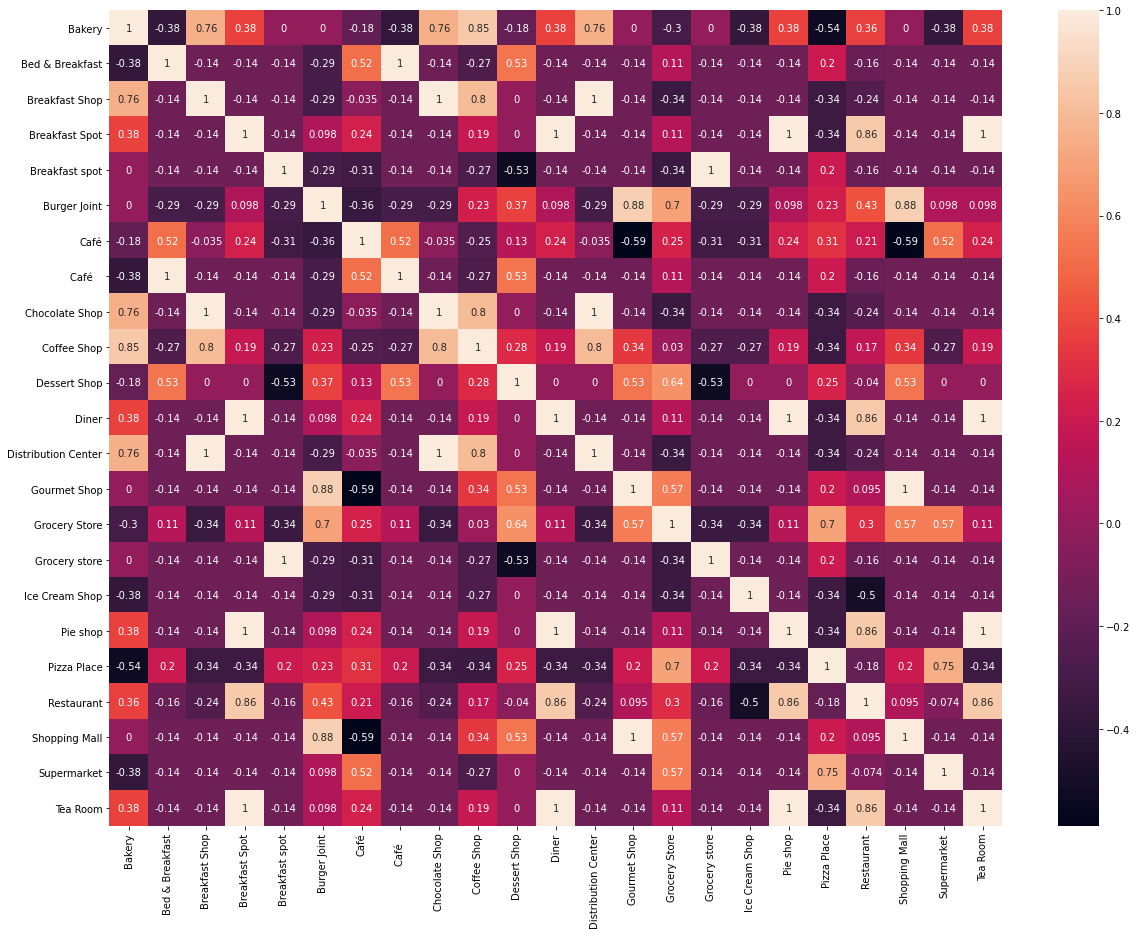

In [127]:
#Creation of correlation heatmap

plt.figure(figsize=(20,15))
sn.heatmap(df_pgksvzta.corr(), annot=True)
plt.show()


In [128]:
# add clustering labels again
df_pgksvzta.insert(0,'Cluster Labels', kmeans2.labels_)

df_pgksvzta

,Cluster Labels,Town,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room
0,2,Ajka,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,3,Győr,2.0,0.0,0.0,2.0,0.0,1.0,4,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,1.0
0,2,Kaposvár,0.0,0.0,0.0,0.0,0.0,1.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0
0,0,Pécs,3.0,0.0,2.0,0.0,0.0,0.0,3,0.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
0,2,Szekszárd,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
0,2,Tatabánya,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
0,1,Veszprém,1.0,0.0,0.0,0.0,0.0,3.0,1,0.0,0.0,4.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,7.0,2.0,0.0,0.0
0,1,Zalaegerszeg,1.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0


In [129]:
#Cutting the dataframe to clusters to see the cluster properties separatedly
df_pgksvzta_a = df_pgksvzta.loc[df_pgksvzta['Cluster Labels'] == 0]
df_pgksvzta_b = df_pgksvzta.loc[df_pgksvzta['Cluster Labels'] == 1]
df_pgksvzta_c = df_pgksvzta.loc[df_pgksvzta['Cluster Labels'] == 2]
df_pgksvzta_d = df_pgksvzta.loc[df_pgksvzta['Cluster Labels'] == 3]


In [130]:
df_pgksvzta_a

,Cluster Labels,Town,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room
0,0,Pécs,3.0,0.0,2.0,0.0,0.0,0.0,3,0.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


In [131]:
df_pgksvzta_b

,Cluster Labels,Town,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room
0,1,Veszprém,1.0,0.0,0.0,0.0,0.0,3.0,1,0.0,0.0,4.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,7.0,2.0,0.0,0.0
0,1,Zalaegerszeg,1.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0


In [132]:
df_pgksvzta_c

,Cluster Labels,Town,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room
0,2,Ajka,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2,Kaposvár,0.0,0.0,0.0,0.0,0.0,1.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0
0,2,Szekszárd,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
0,2,Tatabánya,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0


In [133]:
df_pgksvzta_d

,Cluster Labels,Town,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room
0,3,Győr,2.0,0.0,0.0,2.0,0.0,1.0,4,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,1.0


In [161]:
#Collection of the population data of the town manually from wikipedia into an other dataframe:

data_popul = {
    'Town' : ['Ajka', 'Győr', 'Kaposvár', 'Pécs', 'Szekszárd', 'Tatabánya', 'Veszprém', 'Zalaegerszeg'], 
    'Population' : [29106, 129527, 66245, 156049, 34296, 67753, 61721, 59499], 
        
} 

df_pgksvzta_popul = pd.DataFrame(data_popul)
df_pgksvzta_popul

,Town,Population
0,Ajka,29106
1,Győr,129527
2,Kaposvár,66245
3,Pécs,156049
4,Szekszárd,34296
5,Tatabánya,67753
6,Veszprém,61721
7,Zalaegerszeg,59499


In [162]:
#Sorting the dataframe according to population data 
df_pgksvzta_popul_s = df_pgksvzta_popul.sort_values('Population')
df_pgksvzta_popul_s

,Town,Population
0,Ajka,29106
4,Szekszárd,34296
7,Zalaegerszeg,59499
6,Veszprém,61721
2,Kaposvár,66245
5,Tatabánya,67753
1,Győr,129527
3,Pécs,156049


In [163]:
#summarizing vanues by towns
df_pgksvzta
sum_vanues = df_pgksvzta.sum(axis=1)
sum_vanues

0     6.0
0    36.0
0    19.0
0    21.0
0    17.0
0    12.0
0    25.0
0    14.0
dtype: float64

In [139]:
type(sum_row)

pandas.core.series.Series

In [140]:
#making a dataframe from the series: 
frame = { 'Sum of venues': sum_row } 
  
result = pd.DataFrame(frame) 
  
print(result) 

   Sum of venues
0            6.0
0           36.0
0           19.0
0           21.0
0           17.0
0           12.0
0           25.0
0           14.0


In [141]:
type(result)

pandas.core.frame.DataFrame

In [142]:
# extending our original dataset with sum of venues:
df_pgksvzta_sum = pd.concat([df_pgksvzta, result], axis=1, join="inner")
df_pgksvzta_sum

,Cluster Labels,Town,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room,Sum of venues
0,2,Ajka,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
0,3,Győr,2.0,0.0,0.0,2.0,0.0,1.0,4,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,1.0,36.0
0,2,Kaposvár,0.0,0.0,0.0,0.0,0.0,1.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0,19.0
0,0,Pécs,3.0,0.0,2.0,0.0,0.0,0.0,3,0.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,21.0
0,2,Szekszárd,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,17.0
0,2,Tatabánya,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,12.0
0,1,Veszprém,1.0,0.0,0.0,0.0,0.0,3.0,1,0.0,0.0,4.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,7.0,2.0,0.0,0.0,25.0
0,1,Zalaegerszeg,1.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,14.0


In [152]:
#our final datset is ready:
df_final = df_pgksvzta_sum
df_final.sort_values(by=['Sum of venues'], inplace=True, ascending=True)

df_final

,Cluster Labels,Town,Bakery,Bed & Breakfast,Breakfast Shop,Breakfast Spot,Breakfast spot,Burger Joint,Café,Café,Chocolate Shop,Coffee Shop,Dessert Shop,Diner,Distribution Center,Gourmet Shop,Grocery Store,Grocery store,Ice Cream Shop,Pie shop,Pizza Place,Restaurant,Shopping Mall,Supermarket,Tea Room,Sum of venues
0,2,Ajka,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
0,2,Tatabánya,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,12.0
0,1,Zalaegerszeg,1.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,14.0
0,2,Szekszárd,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,17.0
0,2,Kaposvár,0.0,0.0,0.0,0.0,0.0,1.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0,19.0
0,0,Pécs,3.0,0.0,2.0,0.0,0.0,0.0,3,0.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,21.0
0,1,Veszprém,1.0,0.0,0.0,0.0,0.0,3.0,1,0.0,0.0,4.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,7.0,2.0,0.0,0.0,25.0
0,3,Győr,2.0,0.0,0.0,2.0,0.0,1.0,4,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.0,1.0,36.0


In [153]:
#df_final.plot(x ='yment_Rate', y='Stock_Index_Price', kind = 'scatter')
#plt.show()

In [166]:
#Creation of a new dataframe  containing the sum of venues and number of restaurants. 
data_popul = {
    'Town' : ['Ajka', 'Győr', 'Kaposvár', 'Pécs', 'Szekszárd', 'Tatabánya', 'Veszprém', 'Zalaegerszeg'], 
    'Population' : [29106, 129527, 66245, 156049, 34296, 67753, 61721, 59499],
    'Sum of vanues': [6, 36, 19, 21, 17, 12, 25, 14],
    'Restaurants': [0, 16, 5, 3, 4, 4, 7, 8]
        
} 

df_pgksvzta_popul = pd.DataFrame(data_popul)
df_pgksvzta_popul

,Town,Population,Sum of vanues,Restaurants
0,Ajka,29106,6,0
1,Győr,129527,36,16
2,Kaposvár,66245,19,5
3,Pécs,156049,21,3
4,Szekszárd,34296,17,4
5,Tatabánya,67753,12,4
6,Veszprém,61721,25,7
7,Zalaegerszeg,59499,14,8


In [167]:
#sorting the data frame to population ascending order:
df_pgksvzta_popul_sorted = df_pgksvzta_popul.sort_values('Population')
df_pgksvzta_popul_sorted

,Town,Population,Sum of vanues,Restaurants
0,Ajka,29106,6,0
4,Szekszárd,34296,17,4
7,Zalaegerszeg,59499,14,8
6,Veszprém,61721,25,7
2,Kaposvár,66245,19,5
5,Tatabánya,67753,12,4
1,Győr,129527,36,16
3,Pécs,156049,21,3


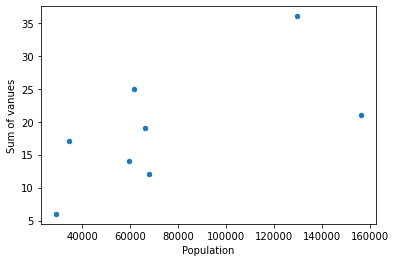

In [157]:
#Plotting the sum of values in the function of the population:
df_pgksvzta_popul_sorted.plot(x ='Population', y='Sum of vanues', kind = 'scatter')
plt.show()

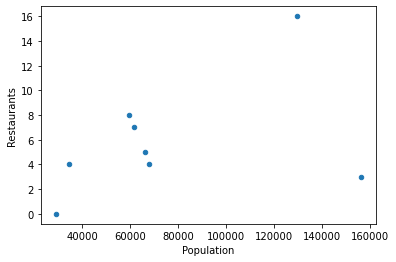

In [168]:
#Plotting the number of restaurants in the function of the population:
df_pgksvzta_popul_sorted.plot(x ='Population', y='Restaurants', kind = 'scatter')
plt.show()

In [ ]:
#Both of plots give an impression about linear correletion between the plotted series. Further evaluation can be found in the presntation and report file.